<a href="https://colab.research.google.com/github/Vekasssss/Wallmart_Python/blob/main/CAPSTONE_wallmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**1 . DATA PRE-PROCESSING**

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/dataset/traindata.csv')
df.head()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,7,20,Friday,7.192192e+09,1,FROZEN FOODS,9117.0
1,7,20,Friday,6.811311e+10,2,SERVICE DELI,4010.0
2,25,28,Friday,8.805520e+11,1,LADIESWEAR,313.0
3,25,28,Friday,8.085947e+10,1,LADIESWEAR,4447.0
4,25,28,Friday,4.900004e+09,1,DSD GROCERY,9538.0


In [ ]:
# Finding NUlls
df.isnull().sum()

TripType                 0
VisitNumber              0
Weekday                  0
Upc                      0
ScanCount                0
DepartmentDescription    0
FinelineNumber           0
dtype: int64

In [ ]:
# Finding Duplicates
df[df.duplicated()]

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
173,25,604,Friday,8.398531e+09,1,HOME MANAGEMENT,8463.0
259,25,943,Friday,8.806320e+11,1,LADIESWEAR,313.0
533,25,1853,Friday,8.809400e+11,1,MENS WEAR,8506.0
557,25,1868,Friday,8.805520e+11,1,LADIESWEAR,3120.0
559,25,1868,Friday,8.806140e+11,1,LADIESWEAR,324.0
...,...,...,...,...,...,...,...
76579,25,190270,Sunday,1.326263e+09,1,"GIRLS WEAR, 4-6X AND 7-14",800.0
76605,25,190281,Sunday,8.806160e+11,1,"GIRLS WEAR, 4-6X AND 7-14",449.0
76732,38,190406,Sunday,1.600044e+09,1,GROCERY DRY GOODS,3555.0
76871,38,190766,Sunday,8.265756e+09,1,DSD GROCERY,2352.0


<Axes: >

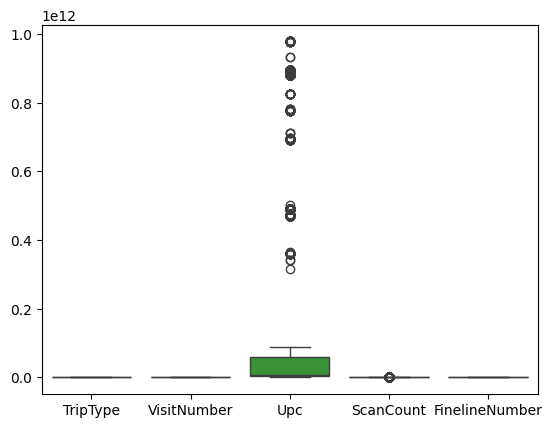

In [ ]:
# Finding outliers --
outliers = ['TripType', 'VisitNumber', 'Upc', 'ScanCount', 'FinelineNumber' ]
import seaborn as sns
sns.boxplot(data = df[outliers])
# Just performed the step of Pre-processing but here outliers can be seen in UPC which will not be insightfull for any EDA or ML. Hence we can remove the column in coming steps.

In [ ]:
df.drop(columns = ['Upc'], inplace = True)

In [ ]:
df

,TripType,VisitNumber,Weekday,ScanCount,DepartmentDescription,FinelineNumber
0,7,20,Friday,1,FROZEN FOODS,9117.0
1,7,20,Friday,2,SERVICE DELI,4010.0
2,25,28,Friday,1,LADIESWEAR,313.0
3,25,28,Friday,1,LADIESWEAR,4447.0
4,25,28,Friday,1,DSD GROCERY,9538.0
...,...,...,...,...,...,...
77181,25,191343,Sunday,2,MENS WEAR,5701.0
77182,25,191343,Sunday,2,DSD GROCERY,9211.0
77183,25,191343,Sunday,1,IMPULSE MERCHANDISE,100.0
77184,25,191343,Sunday,1,MENS WEAR,2828.0


In [ ]:
df.dtypes

TripType                   int64
VisitNumber                int64
Weekday                   object
ScanCount                  int64
DepartmentDescription     object
FinelineNumber           float64
dtype: object

In [ ]:
# EXPLORATORY DATA ANALYSIS
import matplotlib.pyplot as plt

In [ ]:
df.head(3)

,TripType,VisitNumber,Weekday,ScanCount,DepartmentDescription,FinelineNumber
0,7,20,Friday,1,FROZEN FOODS,9117.0
1,7,20,Friday,2,SERVICE DELI,4010.0
2,25,28,Friday,1,LADIESWEAR,313.0


In [ ]:
#1. EDA
# BARPLOT TO CHECK TRIP-TYPE HAVING MAX ORDER COUNTS
# Ans> As per analysis, TripType-38 had purchased max orders_qty of 33535 quantities,
# while TripType-7 has least puchase_QTY

In [ ]:
Triptype_scan =  df.groupby('TripType')['ScanCount'].sum()
B = Triptype_scan.reset_index()
B

,TripType,ScanCount
0,7,25854
1,25,28049
2,38,33535


<ipython-input-10-e863ed4641af>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= B['TripType'], y= B['ScanCount'], palette = 'viridis')


<Axes: xlabel='TripType', ylabel='ScanCount'>

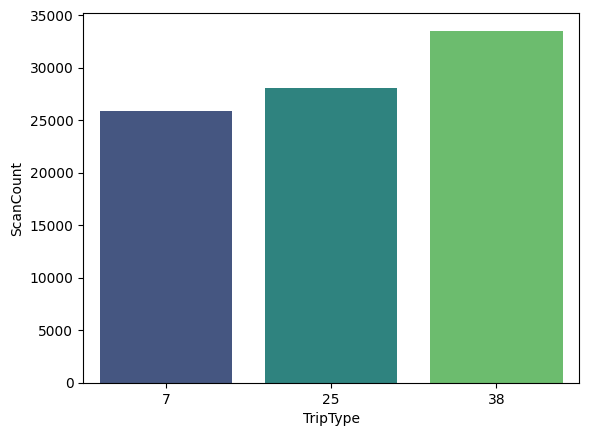

In [ ]:
sns.barplot(x= B['TripType'], y= B['ScanCount'], palette = 'viridis')

In [ ]:
# 2. EDA
# SUM OF ORDERED QTY BASED ON VISIT NUMBER
# Ans> We found that VisitNumber 84350 had purchased max quantities of products that was 89 QTY

In [ ]:
QTY_BY_Visit = df.groupby('VisitNumber')['ScanCount'].sum()
A = QTY_BY_Visit.reset_index()
A.sort_values(by = 'ScanCount', ascending = False)

,VisitNumber,ScanCount
5299,84350,89
8040,127057,81
4430,71143,74
12135,188905,68
1725,27356,66
...,...,...
8876,140036,0
7326,116544,0
8660,136530,-1
4686,75132,-1


In [ ]:
A[['ScanCount', 'VisitNumber']].max()

ScanCount          89
VisitNumber    191343
dtype: int64

In [ ]:
#3. EDA
# TO check Average Ordered QTY on each Visitnumber based on each TripType
# Ans> Per visit avg purchased orders are max for TripType-38 with 11-12 quantites and least for TripType-7 with 4-5 orders per visit.

In [ ]:
df_a=df.groupby(['TripType', 'VisitNumber'])['ScanCount'].sum()
C =df_a.reset_index()
C

,TripType,VisitNumber,ScanCount
0,7,20,3
1,7,72,3
2,7,76,4
3,7,137,2
4,7,199,4
...,...,...,...
12304,38,191231,9
12305,38,191273,5
12306,38,191322,15
12307,38,191326,11


In [ ]:
C.groupby('TripType')['ScanCount'].mean()

TripType
7      4.536585
25     7.584911
38    11.516140
Name: ScanCount, dtype: float64

In [ ]:
#4. EDA
# Analyze Sum of orderQTY based on weekdays for each TripType
# Ans> Sunday has the most ordered Qty for all the TripTypes, while Thrusday has the least order counts for each TripType

In [ ]:
df.head(2)

,TripType,VisitNumber,Weekday,ScanCount,DepartmentDescription,FinelineNumber
0,7,20,Friday,1,FROZEN FOODS,9117.0
1,7,20,Friday,2,SERVICE DELI,4010.0


In [ ]:
df_b=df.groupby(['TripType', 'Weekday'])['ScanCount'].sum()
d = pd.DataFrame(df_b)
d.sort_values(by = ['TripType', 'ScanCount'], ascending =[True,False] )

ScanCount
TripType Weekday             
7        Sunday          4578
         Saturday        3995
         Monday          3616
         Friday          3601
         Wednesday       3577
         Tuesday         3248
         Thursday        3239
25       Sunday          5725
         Saturday        5709
         Friday          4472
         Thursday        3188
         Tuesday         3072
         Monday          3015
         Wednesday       2868
38       Sunday          7101
         Saturday        4910
         Monday          4891
         Friday          4643
         Tuesday         4497
         Wednesday       3972
         Thursday        3521

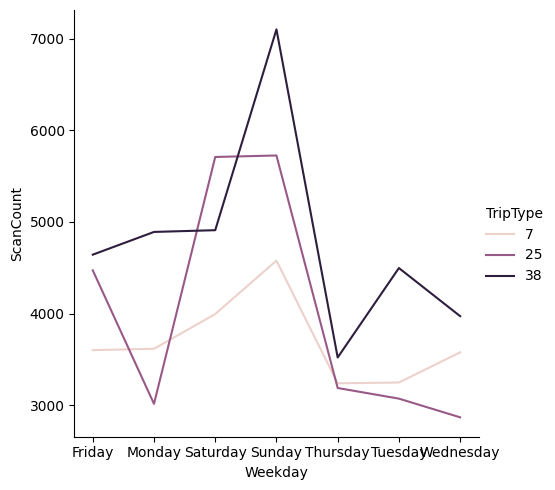

In [ ]:
sns.relplot(x='Weekday', y = 'ScanCount' , kind = 'line' , hue = 'TripType', data = d)

In [ ]:
#5. EDA
# Analyze the DepartmentDescription that can help in Inventory Management
# Ans> Dairy demands at highest on all weekdays, Men wear products demand seems good on all days, Grocery dry products has least demand


In [ ]:
df_e = df.groupby(['TripType', 'Weekday', 'DepartmentDescription'])['ScanCount'].sum()
E = pd.DataFrame(df_e)
EE=E.sort_values(by = ['TripType', 'ScanCount'], ascending=[True,False])
EEE = EE.groupby('TripType').head(5)
EEE


ScanCount
TripType Weekday  DepartmentDescription           
7        Sunday   GROCERY DRY GOODS            811
         Monday   GROCERY DRY GOODS            621
         Thursday GROCERY DRY GOODS            620
         Friday   SERVICE DELI                 613
         Saturday GROCERY DRY GOODS            609
25       Sunday   MENS WEAR                   1278
         Saturday MENS WEAR                   1055
         Friday   MENS WEAR                    824
         Saturday LADIESWEAR                   759
         Friday   LADIESWEAR                   709
38       Sunday   DAIRY                       1767
                  GROCERY DRY GOODS           1597
         Friday   DAIRY                       1200
         Monday   DAIRY                       1197
         Saturday DAIRY                       1193

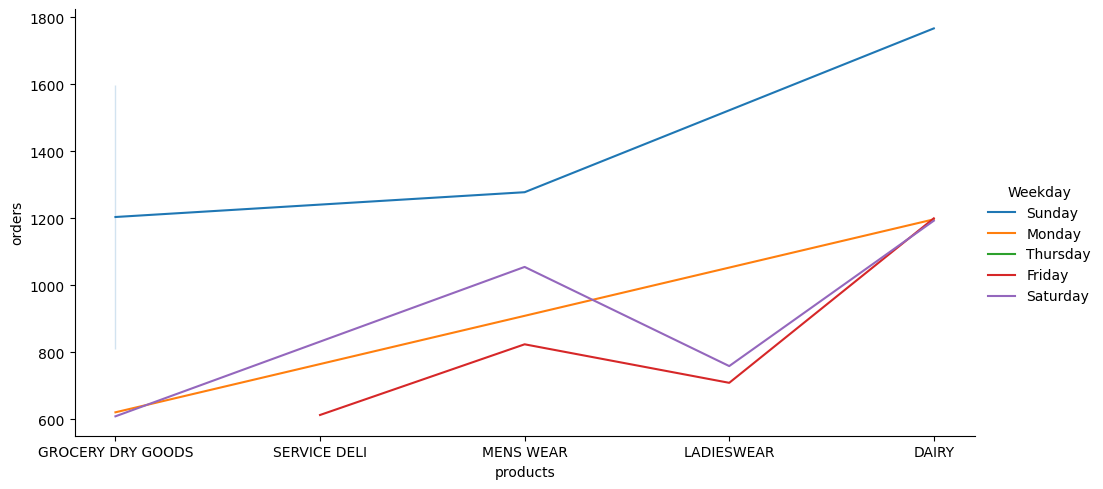

In [ ]:
import matplotlib.pyplot as plt
sns.relplot(x = 'DepartmentDescription', y ='ScanCount', kind = 'line', hue ='Weekday', data = EEE, height =5, aspect = 2 )
plt.xlabel('products')
plt.ylabel('orders')
plt.show()

In [ ]:
df.head(2)

,TripType,VisitNumber,Weekday,ScanCount,DepartmentDescription
0,7,20,Friday,1,FROZEN FOODS
1,7,20,Friday,2,SERVICE DELI


In [ ]:
# checking Skewness (-1 to +1) and we want to remove skewness above 0.5 between (-0.5)
df_s = df[['TripType', 'VisitNumber', 'ScanCount']]
df_s.skew()

TripType       -0.357663
VisitNumber    -0.027284
ScanCount      10.730222
dtype: float64

In [ ]:
df.drop(columns = ['FinelineNumber'], inplace = True )

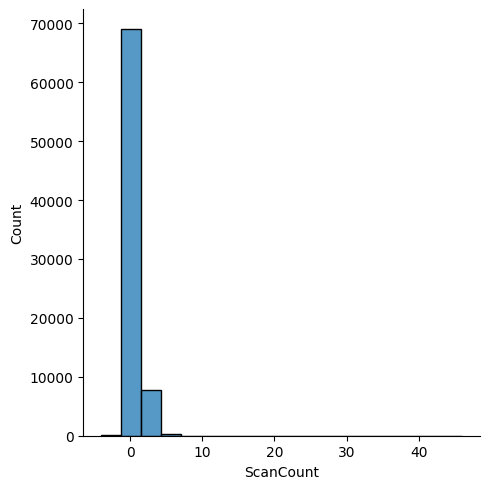

In [ ]:
# SCANCOUNT SKEWNESS
import seaborn as sns
sns.displot(df['ScanCount'])

In [ ]:
from scipy.stats import mstats
df_s['ScanCount'] = pd.Series(mstats.winsorize(df_s['ScanCount'], limits=[0.1, 0.1]))
df_s['ScanCount'].skew()

<ipython-input-14-294cd6ffa3e3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s['ScanCount'] = pd.Series(mstats.winsorize(df_s['ScanCount'], limits=[0.1, 0.1]))


2.5657863085170285

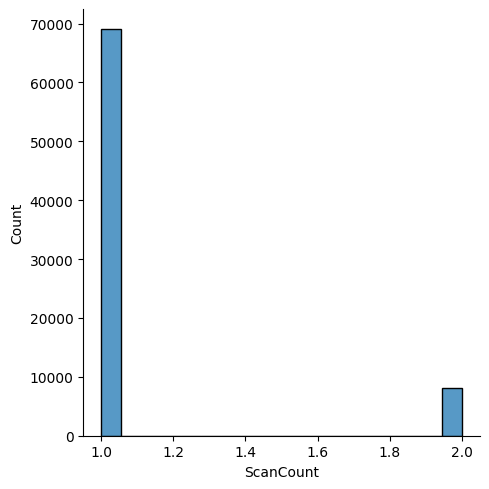

In [ ]:
sns.displot(df_s['ScanCount'])

In [ ]:
df_s.skew()

TripType      -0.357663
VisitNumber   -0.027284
ScanCount      2.565786
dtype: float64

In [ ]:
df['ScanCount'] = df_s['ScanCount']
df['ScanCount'].skew()

2.5657863085170285

In [ ]:
# CORRELATION
cor = df[['TripType','VisitNumber', 'ScanCount' ]]
cor.corr()

,TripType,VisitNumber,ScanCount
TripType,1.000000,0.002086,0.004786
VisitNumber,0.002086,1.000000,-0.003500
ScanCount,0.004786,-0.003500,1.000000


<Axes: >

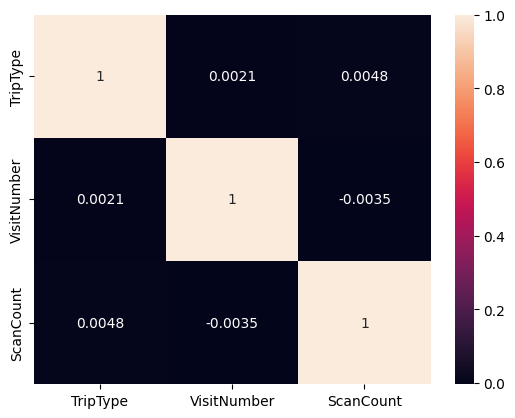

In [ ]:
sns.heatmap(cor.corr(), annot = True)

**2. TRANSFORMATION AND STANDARDIZATION**

In [ ]:
# Tranforming all the categorical to numberical values - 'Weekday' and 'DepartmentDescription'

In [ ]:
from sklearn.preprocessing import LabelEncoder
cols = ['Weekday', 'DepartmentDescription']
for c in cols:
  le = LabelEncoder()
  df[c] = le.fit_transform(df[c])

In [ ]:
df.head(5)

,TripType,VisitNumber,Weekday,ScanCount,DepartmentDescription
0,7,20,0,1,20
1,7,20,0,2,56
2,25,28,0,1,35
3,25,28,0,1,35
4,25,28,0,1,16


In [ ]:
# Standardizing all the values using Standard Scaler
      # splitting dataframe into X and Y

In [ ]:
X = df.iloc[:,1:]
Y = df['TripType']

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_SS = ss.fit_transform(X)
x = pd.DataFrame(X_SS)
y = Y

**3. MODEL DEVELOPMENT**

In [ ]:
# Splitting into Test and Train from the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)
x_train.shape,x_test.shape,      y_train.shape,y_test.shape

((61748, 4), (15438, 4), (61748,), (15438,))

In [ ]:
# Data Balacing for classifier problem --> On Train dataset
df['TripType'].value_counts()

TripType
38    28525
25    26493
7     22168
Name: count, dtype: int64

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
x_train_re, y_train_re = ros.fit_resample(x_train, y_train)

In [ ]:
# Model training : As this is multiclass classification ->
# Decesion Tree and Random Forest Classifier can be used
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier()
model1.fit(x_train_re, y_train_re)

DecisionTreeClassifier()

In [ ]:
# Predictions
y_train_pred = model1.predict(x_train_re)
y_test_pred = model1.predict(x_test)

**4. MODEL METRICS**

In [ ]:
# METRCIS --> Model Accuracy -- Accuracy score , Precesion score , Recall score , F1_score
# >>>
# Accuracy score ->>>>>>>> 81% for Decision Tree Classifier

from sklearn.metrics import accuracy_score, precision_score,recall_score, classification_report
accuracy_test = accuracy_score(y_test, y_test_pred)
cs_test = classification_report(y_test, y_test_pred)
accuracy_test

0.8089130716414044

In [ ]:
precison_test = precision_score(y_test, y_test_pred, average = 'micro')
recall_test = recall_score(y_test, y_test_pred, average = 'micro')
precison_test , recall_test


(0.8089130716414044, 0.8089130716414044)

In [ ]:
# USING BAGGING to improve accuracy with DecisionTree
# Accuracy remains similar with Bagging_DT =>>>>>> 80%

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
bg = BaggingClassifier(base_estimator = dt, n_estimators = 10, random_state = 42)
bg.fit(x_train_re, y_train_re)
y_test_bg= bg.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
accuracy_test_bg = accuracy_score(y_test, y_test_bg)
accuracy_test_bg


0.8010752688172043

In [ ]:
# USING BAGGING to improve accuracy with RandomForestClassifier
# Accuracy decreased with Bagging_RandomForestClassifier =>>>>>>> 78%
    # ------
# Used For-Loop to find the max accuracy by altering n_estimator(1~30)
# Max accuracy received ->>>>>> 78% which again the same as above Bagging_RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
nest=[]
acc =[]
for i in range(1,30):
  bg_rf = BaggingClassifier(base_estimator = rfc, n_estimators = i, random_state = 42)
  bg_rf.fit(x_train_re, y_train_re)
  y_test_bg_rf= bg_rf.predict(x_test)
  accuracy_test_bg_rf = accuracy_score(y_test, y_test_bg_rf)
  nest.append(i)
  acc.append(accuracy_test_bg_rf)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

In [ ]:
acc

[0.7623396813058686,
 0.7593600207280736,
 0.7653193418836637,
 0.7722502914885347,
 0.7737401217774323,
 0.7760720300557067,
 0.7747117502267133,
 0.7767197823552273,
 0.7777561860344604,
 0.7775618603446042,
 0.7787278144837414,
 0.7778209612644125,
 0.7788573649436455,
 0.7789221401735976,
 0.7790516906335018,
 0.780217644772639,
 0.7798289933929266,
 0.780282420002591,
 0.7805415209223993,
 0.779246016323358,
 0.7795698924731183,
 0.7796994429330224,
 0.7800880943127348,
 0.7796346677030703,
 0.7794403420132141,
 0.7800880943127348,
 0.7800880943127348,
 0.7791164658634538,
 0.7807358466122555]

In [ ]:
accuracy_test_bg_rf


0.7811244979919679

In [ ]:
# DecisionTree           = 81% Accuracy : y_test_pred = model1.predict(x_test)
# DecisionTree + Bagging = 80% Accuracy : y_test_bg= bg.predict(x_test)
# RandomForest+ Bagging  = 78% Accuracy : y_test_bg_rf= bg_rf.predict(x_test)

# --> We can select "DecisionTree model" to make predictions for other dataset.

**5 .Making Predictions on new dataset**

In [ ]:
df_new = pd.read_csv('/content/drive/MyDrive/dataset/testdata.csv')
df_new.head()

,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,87,Friday,7.106841e+09,1,FROZEN FOODS,4063
1,361,Friday,6.727878e+10,1,MENS WEAR,1605
2,385,Friday,2.840007e+09,1,DSD GROCERY,4551
3,413,Friday,2.200000e+09,1,IMPULSE MERCHANDISE,135
4,462,Friday,7.282133e+10,1,PLUS AND MATERNITY,744


In [ ]:
#Dropped colums as per MODEL BUILT
df_new.drop(columns = ['Upc','FinelineNumber'], inplace = True)

In [ ]:
#Transformed
from sklearn.preprocessing import LabelEncoder
cat_col = ['Weekday', 'DepartmentDescription']
for colm in cat_col:
  lee = LabelEncoder()
  df_new[colm]=lee.fit_transform(df_new[colm])

NameError: name 'df_new' is not defined

In [ ]:
X_new = df_new.iloc[:,:]
X_new

,VisitNumber,Weekday,ScanCount,DepartmentDescription
0,87,0,1,18
1,361,0,1,37
2,385,0,1,14
3,413,0,1,27
4,462,0,1,45
...,...,...,...,...
2995,191158,3,5,18
2996,191164,3,1,13
2997,191225,3,1,13
2998,191256,3,1,37


In [ ]:
#Standardize
from sklearn.preprocessing import StandardScaler
ss_new = StandardScaler()
X_std = ss_new.fit_transform(X_new)
x_n = pd.DataFrame(X_std)
x_n

,0,1,2,3
0,-1.747144,-1.430756,-0.241391,-0.547027
1,-1.742239,-1.430756,-0.241391,0.749030
2,-1.741810,-1.430756,-0.241391,-0.819882
3,-1.741309,-1.430756,-0.241391,0.066895
4,-1.740432,-1.430756,-0.241391,1.294739
...,...,...,...,...
2995,1.672615,0.113410,5.988048,-0.547027
2996,1.672723,0.113410,-0.241391,-0.888095
2997,1.673814,0.113410,-0.241391,-0.888095
2998,1.674369,0.113410,-0.241391,0.749030


In [ ]:
predict_new = model1.predict(x_n)
predict_new

array([ 7, 25,  7, ...,  7, 25, 25])

In [ ]:
dfA = pd.DataFrame(predict_new)
dfA

,0
0,7
1,25
2,7
3,38
4,25
...,...
2995,38
2996,38
2997,7
2998,25


In [ ]:
df1 = df_new['VisitNumber']
df1

0           87
1          361
2          385
3          413
4          462
         ...  
2995    191158
2996    191164
2997    191225
2998    191256
2999    191337
Name: VisitNumber, Length: 3000, dtype: int64

In [ ]:
final = pd.concat([df1,dfA],axis = 1)
final

,VisitNumber,0
0,87,7
1,361,25
2,385,7
3,413,38
4,462,25
...,...,...
2995,191158,38
2996,191164,38
2997,191225,7
2998,191256,25
